In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('train_day30.csv',usecols=['Age','Fare','Survived'])

In [41]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [42]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [43]:
df.fillna({'Age':df['Age'].mean()}, inplace = True)

In [44]:
X = df.drop('Survived', axis =1)
y = df['Survived']

In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

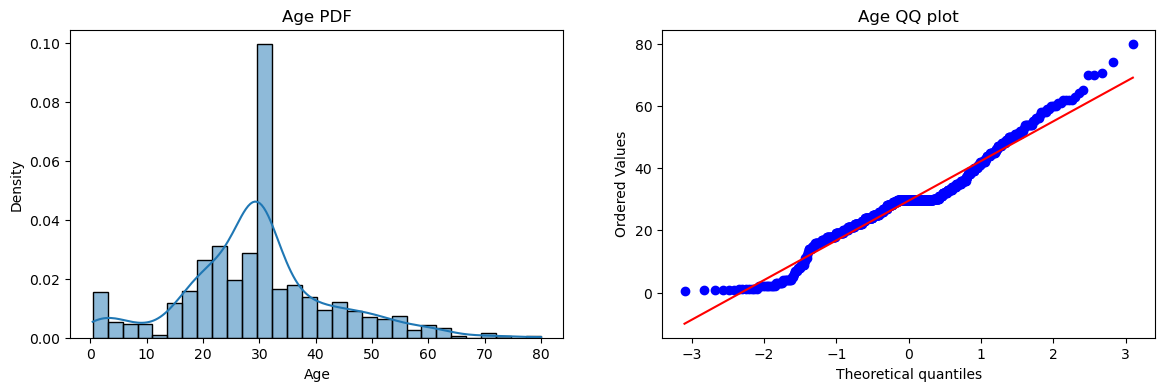

In [47]:
plt.figure(figsize= (14,4))
plt.subplot(121)           # 1 row, 2 column, subplot 1
sns.histplot(X_train['Age'], kde=True, stat="density", bins=30)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')

plt.show()

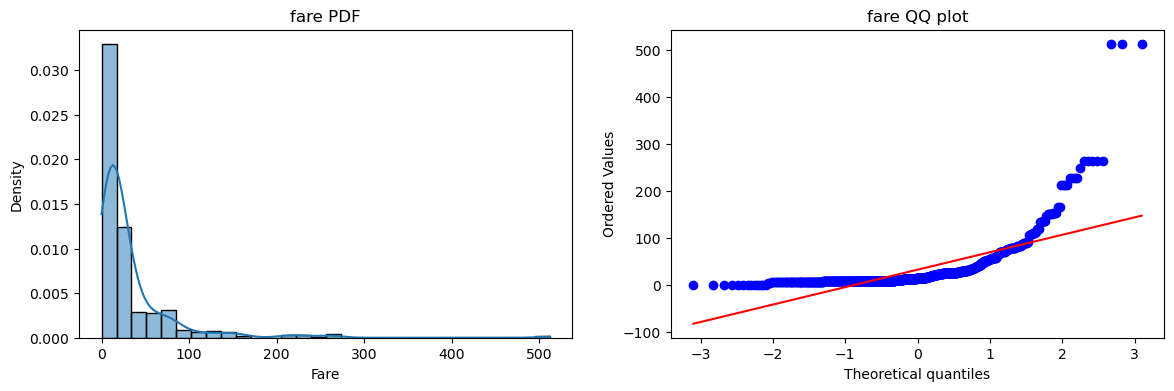

In [48]:
plt.figure(figsize= (14,4))
plt.subplot(121)           # 1 row, 2 column, subplot 1
sns.histplot(X_train['Fare'], kde=True, stat="density", bins=30)
plt.title('fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('fare QQ plot')

plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [50]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [51]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred =clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
print("Logistic regression:",accuracy_score(y_pred,y_test))
print('Decision tree classifier:',accuracy_score(y_pred2, y_test))

Logistic regression: 0.6480446927374302
Decision tree classifier: 0.6536312849162011


## Applying function transformer

In [53]:
from sklearn.preprocessing import FunctionTransformer

In [54]:
trf = FunctionTransformer(func= np.log1p)

In [55]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [56]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred =clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

In [57]:
print("Logistic regression:",accuracy_score(y_pred,y_test))
print('Decision tree classifier:',accuracy_score(y_pred2, y_test))

Logistic regression: 0.6815642458100558
Decision tree classifier: 0.6536312849162011


In [58]:
from sklearn.model_selection import cross_val_score

X_transformed = trf.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf,X_transformed,y, scoring='accuracy', cv=10)))
print('DT', np.mean(cross_val_score(clf,X_transformed, y, scoring='accuracy',cv=10)))
                                    

LR 0.678027465667915
DT 0.678027465667915


Text(0.5, 1.0, 'Fare after log')

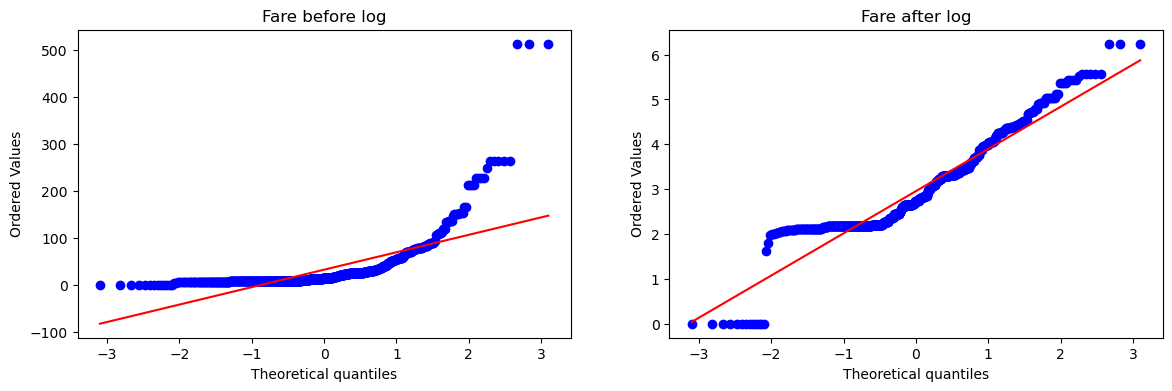

In [60]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot= plt)
plt.title('Fare before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare after log')

Text(0.5, 1.0, 'Fare after log')

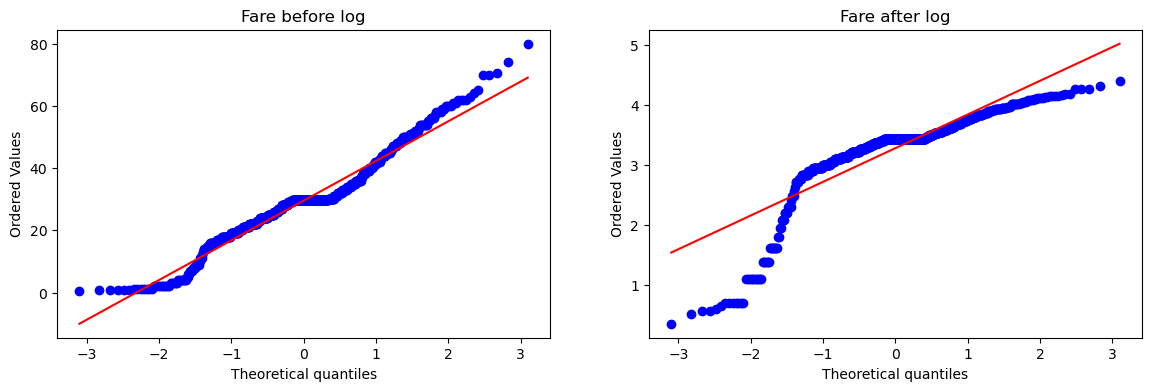

In [61]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot= plt)
plt.title('Fare before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Fare after log')

## Applying function transformer only for Fare

In [65]:
from sklearn.compose import ColumnTransformer

trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])], remainder = 'passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.fit_transform(X_test)

In [67]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred =clf.predict(X_test_transformed2)
y_pred1 = clf2.predict(X_test_transformed2)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [68]:
print("Logistic regression:",accuracy_score(y_pred,y_test))
print('Decision tree classifier:',accuracy_score(y_pred1, y_test))

Logistic regression: 0.40782122905027934
Decision tree classifier: 0.6256983240223464


In [70]:
def apply_transform(transform):
    X= df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder = 'passthrough')
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()
    print('Accuracy',np.mean(cross_val_score(clf,X_trans, y,scoring = 'accuracy',cv=10)))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'],dist='norm', plot=plt)
    plt.title('Fare before transform')
    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist='norm', plot= plt)
    plt.title('Fare after transform')
    plt.show()

Accuracy 0.6589013732833957


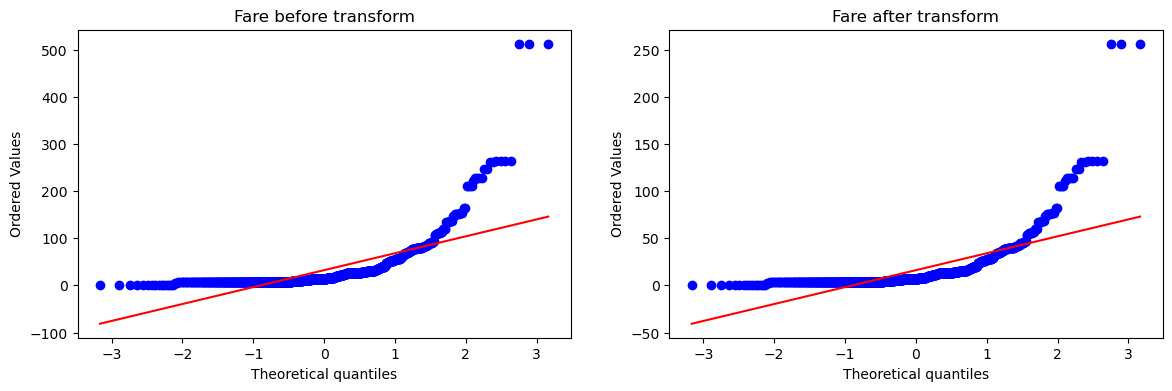

In [76]:
apply_transform(lambda x:x**1/2)

Accuracy 0.61729088639201


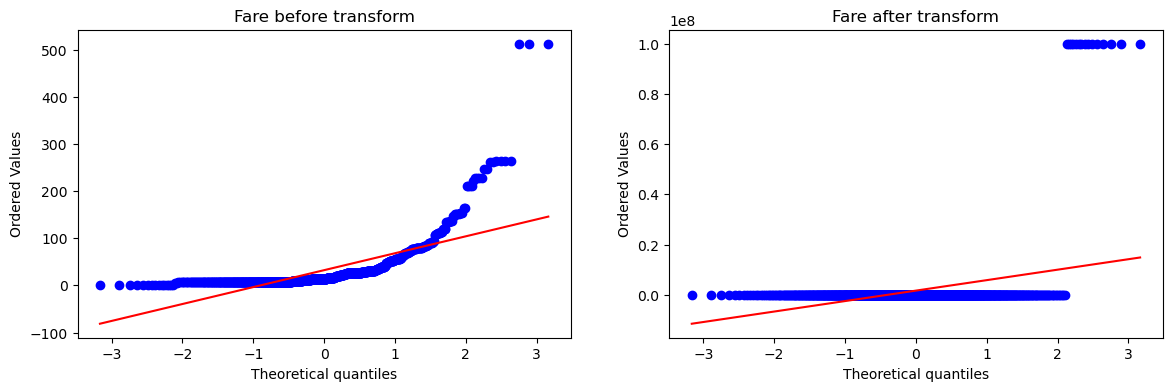

In [85]:
# reciprocal transform

apply_transform(lambda x:1/(x+0.00000001))

Accuracy 0.6195131086142323


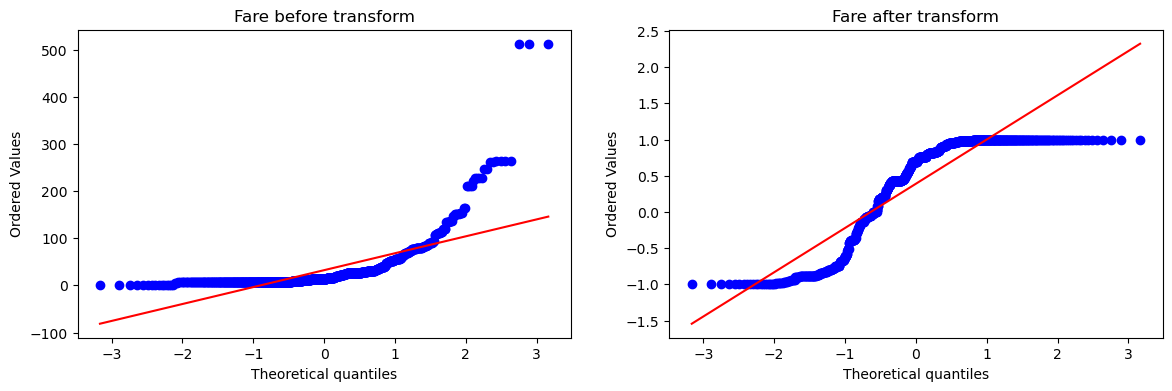

In [86]:
apply_transform(np.sin)